In [1]:
import os
import pandas as pd
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import starbars

In [2]:
datasets = [
    'bindingdb', # reference dataset should be the first
    'bindingdb_active',
    'protobind_diff',
    'reinvent',
    'pocket2mol',
    'pocketflow',
    'tamgen',
    'targetdiff',
]
datasets_names = [
    'BindingDB (random)', # reference dataset should be the first
    'BindingDB (active)',
    'ProtoBind-Diff',
    'REINVENT4',
    'Pocket2Mol',
    'PocketFlow',
    'TamGen',
    'TargetDiff',
]
assert len(datasets) == len(datasets_names)
map_names = dict(zip(datasets, datasets_names))


In [4]:
cpath = Path(os.getcwd())
results_path =  cpath.parent / "results"

annotation = pd.read_csv(cpath.parent / "paper" / 'tables' / 'selected_targets_benchmark.csv', index_col='Name')

display(annotation)


,Number of samples in the train set,Dataset type,Family name,UniProt ID,PDB name,L1 family name,L2 family name,sequence_int
Name,,,,,,,,
ESR1,4483,easy,Nuclear receptor,P03372,2r6w,Transcription factor,Nuclear receptor,138
HCRTR1,12691,easy,GPCR,O43613,4zjc,Membrane receptor,Family A G protein-coupled receptor,176
JAK1,12455,easy,Kinase,P23458,3eyg,Enzyme,Kinase,1145
P2RX3,5140,easy,Ion channel,P56373,5svl,Ion channel,Ligand-gated ion channel,2054
KDM1A,4622,easy,Protein-protein interaction target,O60341,5lhg,Epigenetic regulator,Eraser,2281
IDH1,5177,easy,Non-kinase enzyme,O75874,4umx,Enzyme,Oxidoreductase,2908
RIOK1,15,hard,Kinase,Q9BRS2,4otp,Enzyme,Kinase,1163
NR4A1,28,hard,Nuclear receptor,P22736,3v3q,Transcription factor,Nuclear receptor,1230
GRIK1,335,hard,Ion channel,P39086,3fv1,Ion channel,Ligand-gated ion channel,1852


### Print statistics

In [13]:
SCORE = 'ligand_iptm'
for dataset, df_ in scores_boltz.items():
    print(dataset.upper())
    display(df_.groupby('gene_id')[SCORE].agg(['mean', 'sem', 'count']))

BINDINGDB (RANDOM)


,mean,sem,count
gene_id,,,
CCR9,0.54386,0.017901,100
ESR1,0.71812,0.014436,100
FTO,0.59711,0.018434,100
GRIK1,0.60418,0.020861,100
HCRTR1,0.70560,0.012811,100
IDH1,0.49345,0.019629,100
JAK1,0.74970,0.018427,100
KDM1A,0.74086,0.012516,100
NR4A1,0.44000,0.015778,100


BINDINGDB (ACTIVE)


,mean,sem,count
gene_id,,,
CCR9,0.647395,0.011573,86
ESR1,0.936640,0.005928,100
FTO,0.633750,0.054983,32
GRIK1,0.904320,0.010901,97
HCRTR1,0.893910,0.007386,100
IDH1,0.659300,0.019893,100
JAK1,0.953596,0.005155,99
KDM1A,0.805530,0.008613,100
NR4A1,0.584750,0.050599,20


PROTOBIND-DIFF


,mean,sem,count
gene_id,,,
CCR9,0.600280,0.012019,100
ESR1,0.862410,0.008366,100
FTO,0.588590,0.022511,100
GRIK1,0.861869,0.009672,99
HCRTR1,0.802705,0.009883,61
IDH1,0.601670,0.021665,100
JAK1,0.817927,0.015737,82
KDM1A,0.773848,0.009838,99
NR4A1,0.535222,0.022118,99


REINVENT4


,mean,sem,count
gene_id,,,
CCR9,0.573370,0.008006,100
ESR1,0.724820,0.012554,100
FTO,0.628940,0.017712,100
GRIK1,0.755180,0.018994,100
HCRTR1,0.765103,0.012260,87
IDH1,0.463050,0.019859,100
JAK1,0.629420,0.013485,100
KDM1A,0.795310,0.007613,100
NR4A1,0.425980,0.014402,100


POCKET2MOL


,mean,sem,count
gene_id,,,
CCR9,0.611720,0.015250,100
ESR1,0.839400,0.012319,65
FTO,0.775440,0.017144,100
GRIK1,0.865092,0.012957,98
HCRTR1,0.802583,0.013448,72
IDH1,0.508321,0.017939,84
JAK1,0.816372,0.020290,43
KDM1A,0.759190,0.008577,100
NR4A1,0.409430,0.014041,100


POCKETFLOW


,mean,sem,count
gene_id,,,
CCR9,0.600180,0.012766,100
ESR1,0.849180,0.010509,100
FTO,0.592630,0.020144,100
GRIK1,0.804031,0.016410,98
HCRTR1,0.715730,0.012047,100
IDH1,0.605250,0.013849,100
JAK1,0.686190,0.017307,100
KDM1A,0.763600,0.014334,100
NR4A1,0.447130,0.015687,100


TAMGEN


,mean,sem,count
gene_id,,,
CCR9,0.60726,0.015046,100
ESR1,0.69130,0.022170,100
FTO,0.73379,0.020668,100
GRIK1,0.71511,0.015288,100
HCRTR1,0.69422,0.018401,100
IDH1,0.40252,0.015586,100
JAK1,0.74585,0.017305,100
KDM1A,0.77205,0.012309,100
NR4A1,0.46136,0.018445,100


TARGETDIFF


,mean,sem,count
gene_id,,,
CCR9,0.62018,0.014625,100
ESR1,0.82365,0.012020,100
FTO,0.69275,0.016572,100
GRIK1,0.77104,0.011843,99
HCRTR1,0.77561,0.010137,100
IDH1,0.62967,0.017540,100
JAK1,0.84147,0.010268,100
KDM1A,0.78750,0.009074,100
NR4A1,0.45159,0.015162,100


### Create dataframe for barplots

In [14]:
from scipy.stats import mannwhitneyu

def prepare_data_for_plotting(scores: dict, score_label, score_treshold=0.85, outliers_val=3, score_increase=True):    
    data_plots = {}
    pvalues = {}
    enrichment = {}
    
    pval_cut = 0.05 / len(datasets_other)
    enrichment_significant = []
    
    for t in targets:
        if t not in annotation.index:
            continue
        df = pd.concat([df_[df_.gene_id == t] for df_ in scores.values()])
        df = df[df[score_label] < outliers_val]
        pvalues[t] = []
        for ref_name, sample_name in box_pairs:
            x = df[df.dataset==ref_name][score_label]
            y = df[df.dataset==sample_name][score_label]
            if score_increase:
                enrich_sample = (y >= score_treshold).sum() / len(y)
                # enrich_ref = max((x >= score_treshold).sum(), 1) / len(x)
                ref_active =  (x >= score_treshold).sum()
            else:
                enrich_sample = (y <= score_treshold).sum() / len(y)
                # enrich_ref = max((x >= score_treshold).sum(), 1) / len(x)
                ref_active =  (x <= score_treshold).sum()

            enrich_ref = ref_active / len(x) if ref_active > 0 else 0.01
            enrich_score = enrich_sample/enrich_ref
            if len(x) < 10 or len(y) < 10:
                pval = (np.nan, np.nan)
            elif np.median(x) > np.median(y) and score_increase:  # discard statistics, if ref grop is lower that control
                pval = (np.nan, np.nan)
            elif np.median(x) < np.median(y) and not score_increase:  # discard statistics, if ref grop is lower that control
                pval = (np.nan, np.nan)
            else:
                pval = mannwhitneyu(x,y)
            if sample_name  == actives:
                if pval[1] < pval_cut:
                    enrichment_significant.append(t)
            pvalues[t].append((ref_name, sample_name, pval[1]))
            if sample_name not in  enrichment:
                enrichment[sample_name] = [enrich_score]
            else:
                enrichment[sample_name].append(enrich_score)         
        data_plots[t] = df
    enrichment = pd.DataFrame(enrichment, index=targets)
    enrichment['sign'] = enrichment.index.isin(enrichment_significant).astype(int)
    return data_plots, pvalues, enrichment

In [15]:
boltz_score = 'ligand_iptm'
reference = datasets_names[0]
actives = datasets_names[1]

print("Reference model:", reference,'\nActives model:', actives)
datasets_other = list(datasets_names)
datasets_other.remove(reference)

ref_df = scores_boltz[reference]
targets = annotation.index.intersection(ref_df.gene_id.unique()).tolist()
box_pairs = list(itertools.product([reference], datasets_other))

data_plots, pvalues, data_enrich_boltz = prepare_data_for_plotting(scores_boltz, score_label=boltz_score, score_treshold=0.85)

Reference model: BindingDB (random) 
Actives model: BindingDB (active)


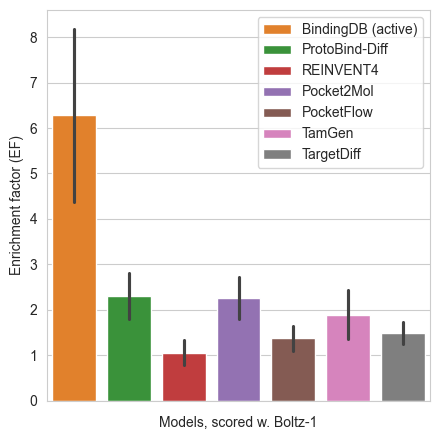

In [16]:
plt.figure(figsize=(4.5, 4.5))
ax = sns.barplot(data=data_enrich_boltz,
                 errorbar='se', order=datasets_other, hue_order=datasets_names, legend='brief')
ax.set_xticklabels([])
ax.set_xlabel('Models, scored w. Boltz-1')
ax.set_ylabel('Enrichment factor (EF)')

# Remove old legend and create new one
legend = ax.get_legend()
handles, labels = legend.legend_handles , legend.get_texts()
new_handles = handles[1:]  # Skip first handle
new_labels = [label.get_text() for label in labels[1:]]  # Skip first label
legend.remove()
plt.legend(new_handles, new_labels)

plt.tight_layout()
plt.savefig(results_path / 'figures' / 'boltz_enrichment.png')
plt.show()

In [17]:
display(data_enrich_boltz)
os.makedirs(results_path / 'tables', exist_ok=True)
data_enrich_boltz.to_latex(results_path / 'tables' / 'boltz_enrichment.tex', float_format='%.2f' )

,BindingDB (active),ProtoBind-Diff,REINVENT4,Pocket2Mol,PocketFlow,TamGen,TargetDiff,sign
ESR1,4.045455,2.818182,0.818182,2.377622,2.772727,1.500000,2.363636,1
HCRTR1,7.600000,2.786885,2.528736,3.194444,1.300000,2.100000,2.200000,1
JAK1,2.365115,1.338489,0.243902,1.134430,0.487805,1.000000,1.268293,1
P2RX3,8.000000,0.978474,0.571429,1.767305,0.865801,0.714286,1.571429,1
KDM1A,1.500000,1.010101,1.090909,0.727273,1.318182,1.181818,1.318182,1
IDH1,4.666667,3.166667,0.666667,0.595238,1.000000,0.000000,2.666667,1
RIOK1,1.190476,1.555556,0.500000,1.234568,1.515152,0.833333,1.444444,0
NR4A1,10.000000,6.565657,0.500000,1.000000,1.000000,1.500000,0.000000,0
GRIK1,6.406480,4.401154,3.214286,5.029155,3.644315,1.357143,1.948052,1
FTO,4.062500,1.500000,1.400000,4.300000,1.700000,4.000000,2.000000,0


8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03


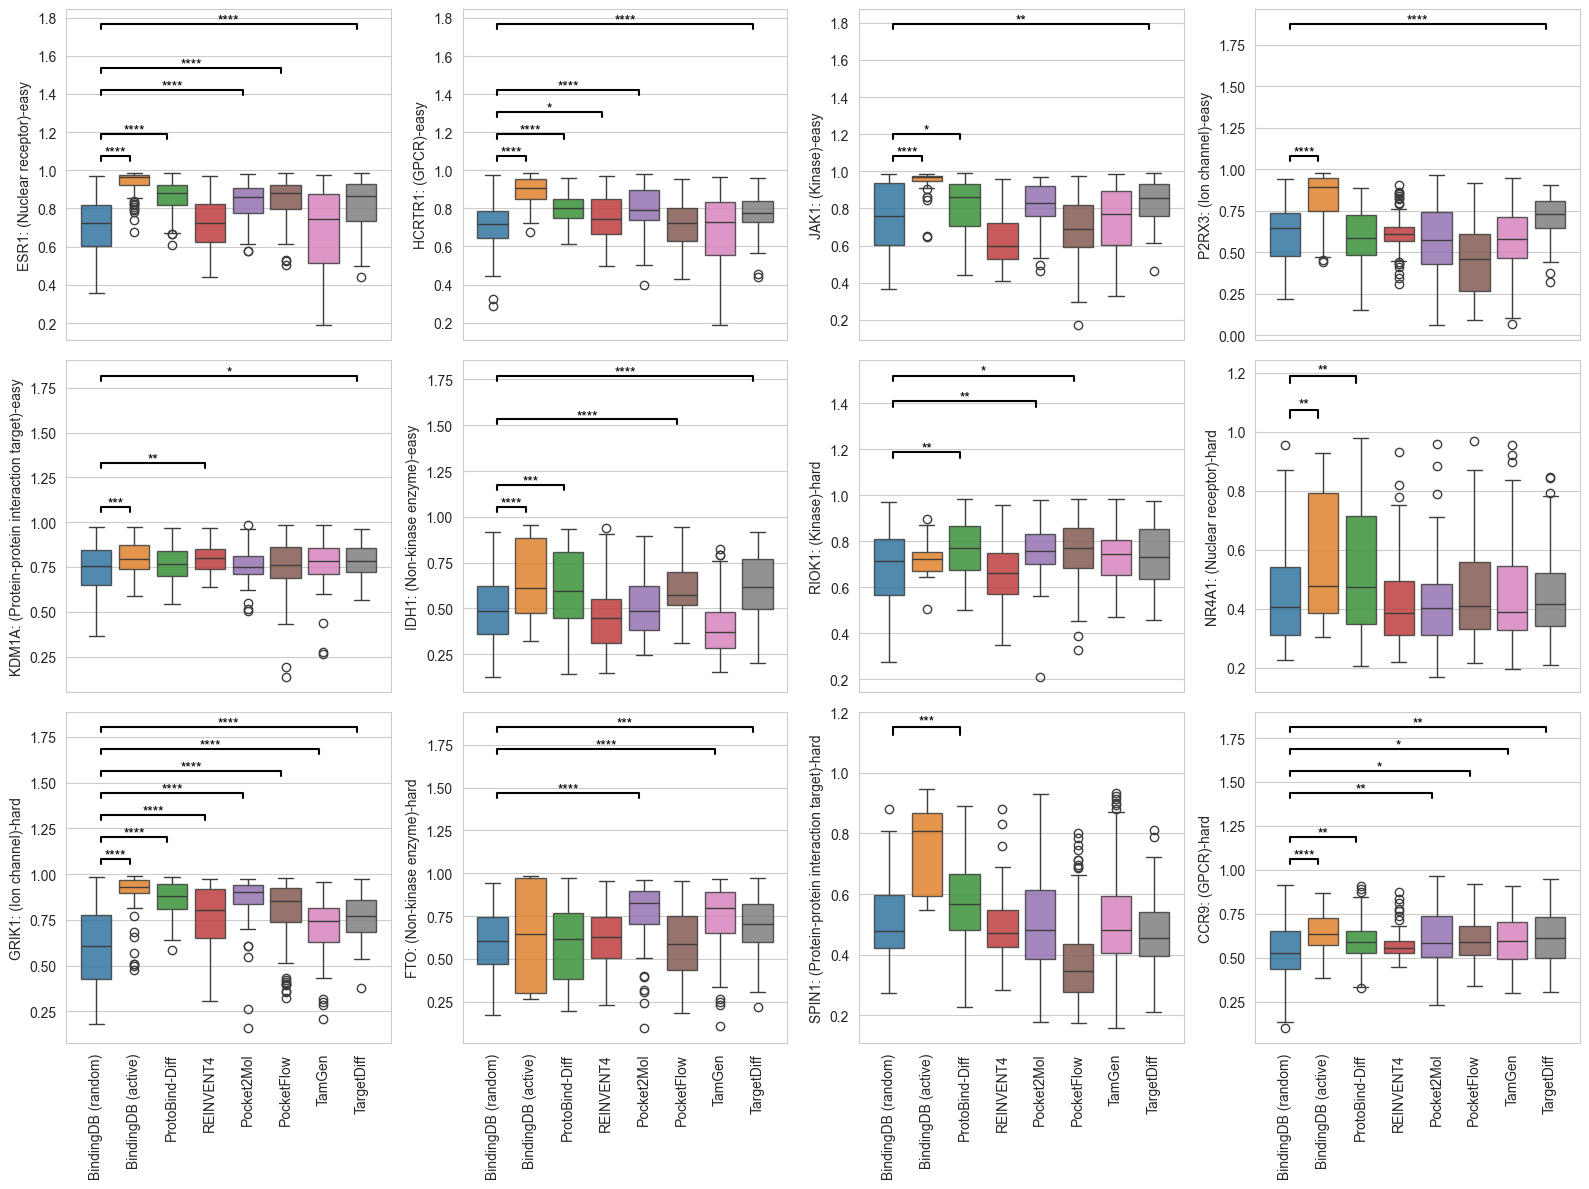

In [19]:
os.makedirs(results_path / 'figures', exist_ok=True)

nrows = 3
ncols = len(data_plots) // nrows
if nrows * ncols < len(data_plots):
    ncols += 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(ncols*4, nrows*4)

axs_iter = iter(axs.flatten())

for i, (gene, df_) in enumerate(data_plots.items()):
    ax = next(axs_iter)
    sns.boxplot(data=df_, x="dataset", y='ligand_iptm', order=datasets_names, hue='dataset',
                ax=ax, hue_order=datasets_names, boxprops=dict(alpha=.85))
    starbars.draw_annotation(pvalues[gene], ns_show=False, ax=ax)
    if gene in annotation.index:
        anno = annotation.loc[gene]
        anno = f': ({anno["Family name"]})-{anno["Dataset type"]}'
    else:
        anno = ''
        
    ax.set_ylabel(gene + anno)
    if i // ncols < nrows - 1:
        ax.set_xticklabels([])
    else:
        ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel(None)
plt.tight_layout()
plt.savefig(results_path / 'figures' / 'boltz_score.png')
plt.show()

## Vina Scores

In [20]:
scores_vina = {}
for key in datasets:
    output_dataset_dir = results_path / 'vina' / key
    all_scores = list(output_dataset_dir.glob('*_scores.csv'))
    if len(all_scores) == 0:
        print(f"No dockig results for {key}")
        continue
    else:
        print(f"Found {len(all_scores)} targets for {key}")

    df_ = pd.concat([pd.read_csv(path) for path in all_scores])
    df_ = df_[df_.lowest_conformer]
    df_['dataset'] = map_names[key]
    df_ = df_.drop(columns=['ligand_number', 'enumeration', 'conformer_number', 'lowest_conformer'])
    df_['gene_id'] = [x.split('_')[0] for x in df_['name']]
    df_ = df_[df_['gene_id'].isin(annotation.index)]
    scores_vina[map_names[key]] = df_

Found 12 targets for bindingdb
Found 12 targets for bindingdb_active
Found 12 targets for protobind_diff
Found 12 targets for reinvent
Found 12 targets for pocket2mol
Found 12 targets for pocketflow
Found 12 targets for tamgen
Found 12 targets for targetdiff


In [21]:
SCORE = 'score'
for dataset, df_ in scores_vina.items():
    print(dataset.upper())
    display(df_.groupby('gene_id')['score'].agg(['mean', 'sem', 'count']))

BINDINGDB (RANDOM)


,mean,sem,count
gene_id,,,
CCR9,-6.194072,0.677425,97
ESR1,-7.913155,0.096475,97
FTO,-8.388021,0.101775,97
GRIK1,0.609660,0.974853,97
HCRTR1,-8.696247,0.523158,97
IDH1,-8.766031,0.102751,97
JAK1,-7.921918,0.423180,97
KDM1A,-8.407258,0.110929,97
NR4A1,-7.118165,0.079720,97


BINDINGDB (ACTIVE)


,mean,sem,count
gene_id,,,
CCR9,-8.505871,0.244808,85
ESR1,-8.936520,0.113297,100
FTO,-8.085516,0.170518,31
GRIK1,-5.091691,0.301431,97
HCRTR1,-9.929280,0.073859,100
IDH1,-8.868953,0.102966,86
JAK1,-8.980592,0.098375,98
KDM1A,-8.460949,0.091584,99
NR4A1,-6.643400,0.236848,20


PROTOBIND-DIFF


,mean,sem,count
gene_id,,,
CCR9,-8.315850,0.175044,100
ESR1,-8.276194,0.099805,98
FTO,-8.087071,0.094492,99
GRIK1,-6.678694,0.144869,98
HCRTR1,-9.676930,0.100524,57
IDH1,-8.894373,0.109403,83
JAK1,-8.557585,0.097825,82
KDM1A,-8.058351,0.082570,97
NR4A1,-6.945650,0.061885,100


REINVENT4


,mean,sem,count
gene_id,,,
CCR9,-9.259340,0.088934,100
ESR1,-8.656490,0.081679,100
FTO,-7.795570,0.074416,100
GRIK1,-6.108071,0.118017,99
HCRTR1,-10.082460,0.075849,87
IDH1,-9.750770,0.055972,100
JAK1,-8.678620,0.080723,100
KDM1A,-8.202500,0.073571,100
NR4A1,-6.399660,0.056968,100


POCKET2MOL


,mean,sem,count
gene_id,,,
CCR9,-8.950320,0.187505,100
ESR1,-9.084692,0.190009,65
FTO,-8.535210,0.110165,100
GRIK1,-4.936230,0.294365,100
HCRTR1,-9.222250,0.194448,72
IDH1,-8.704434,0.143805,83
JAK1,-8.349143,0.179979,42
KDM1A,-8.916430,0.147026,100
NR4A1,-7.027020,0.072466,100


POCKETFLOW


,mean,sem,count
gene_id,,,
CCR9,-7.994480,0.152885,100
ESR1,-8.225232,0.125721,99
FTO,-7.754010,0.168313,99
GRIK1,-6.654175,0.234875,97
HCRTR1,-7.855420,0.152436,100
IDH1,-9.083450,0.180037,100
JAK1,-8.503670,0.147948,97
KDM1A,-7.634780,0.139804,100
NR4A1,-6.268465,0.128386,99


TAMGEN


,mean,sem,count
gene_id,,,
CCR9,-8.30861,0.126066,100
ESR1,-6.48076,0.084315,100
FTO,-6.80634,0.080060,100
GRIK1,-3.11875,0.294150,100
HCRTR1,-7.42286,0.106647,100
IDH1,-6.19107,0.091012,100
JAK1,-6.37932,0.081604,100
KDM1A,-7.56468,0.087049,100
NR4A1,-6.68033,0.075941,100


TARGETDIFF


,mean,sem,count
gene_id,,,
CCR9,-7.402900,0.280331,100
ESR1,-7.994561,0.108191,98
FTO,-7.350847,0.096630,98
GRIK1,2.124960,0.933148,99
HCRTR1,-8.301740,0.101299,100
IDH1,-8.670794,0.093408,97
JAK1,309439.718052,309447.153989,97
KDM1A,315626.309283,315633.549467,99
NR4A1,-6.141070,0.064004,100


In [22]:
vina_score = 'score'
reference = datasets_names[0]
actives = datasets_names[1]

print("Reference model:", reference,'\nActives model:', actives)
datasets_other = list(datasets_names)
datasets_other.remove(reference)

ref_df = scores_boltz[reference]
targets = annotation.index.intersection(ref_df.gene_id.unique()).tolist()
box_pairs = list(itertools.product([reference], datasets_other))


data_plots, pvalues, data_enrich_vina = prepare_data_for_plotting(scores_vina, score_label=vina_score, score_treshold=-10, score_increase=False)

display(data_enrich_vina)
os.makedirs(results_path / 'tables', exist_ok=True)
data_enrich_vina.to_latex(results_path / 'tables' / 'vina_enrichment.tex', float_format='%.2f' )

Reference model: BindingDB (random) 
Actives model: BindingDB (active)


,BindingDB (active),ProtoBind-Diff,REINVENT4,Pocket2Mol,PocketFlow,TamGen,TargetDiff,sign
ESR1,18.430000,4.948980,4.850000,25.369231,7.838384,0.0000,3.959184,1
HCRTR1,1.728000,1.212632,2.074483,1.226667,0.460800,0.0384,0.268800,1
JAK1,2.122449,0.390244,0.960000,0.000000,2.804124,0.0000,0.166667,1
P2RX3,0.500000,0.000000,0.000000,0.000000,0.000000,0.7275,0.000000,0
KDM1A,0.559885,0.142857,0.138571,3.325714,0.277143,0.0000,0.141399,0
IDH1,1.127907,0.934940,3.104000,1.402410,3.298000,0.0000,0.700000,0
RIOK1,6.928571,2.910000,0.970000,19.160494,7.000000,2.9100,0.000000,0
NR4A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0
GRIK1,1.041667,0.000000,0.000000,1.020408,0.000000,0.0000,0.000000,1
FTO,0.521505,0.163300,0.000000,1.293333,1.143098,0.0000,0.000000,0


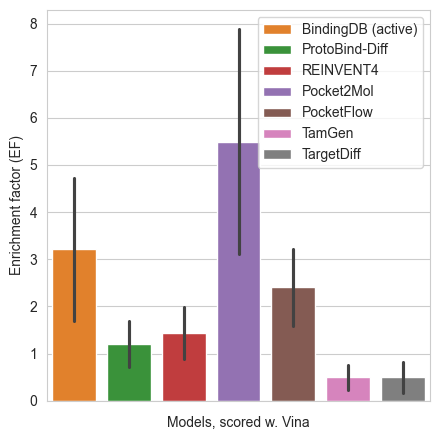

In [23]:
plt.figure(figsize=(4.5, 4.5))
ax = sns.barplot(data=data_enrich_vina, errorbar='se', order=datasets_other, hue_order=datasets_names, legend='brief')
ax.set_xticklabels([])
ax.set_xlabel('Models, scored w. Vina')
ax.set_ylabel('Enrichment factor (EF)')

# Remove old legend and create new one
legend = ax.get_legend()
handles, labels = legend.legend_handles , legend.get_texts()
new_handles = handles[1:]  # Skip first handle
new_labels = [label.get_text() for label in labels[1:]]  # Skip first label
legend.remove()
plt.legend(new_handles, new_labels)

plt.tight_layout()
plt.savefig(results_path / 'figures' / 'vina_enrichment.png')
plt.show()

/tmp/ipykernel_615345/3838420552.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


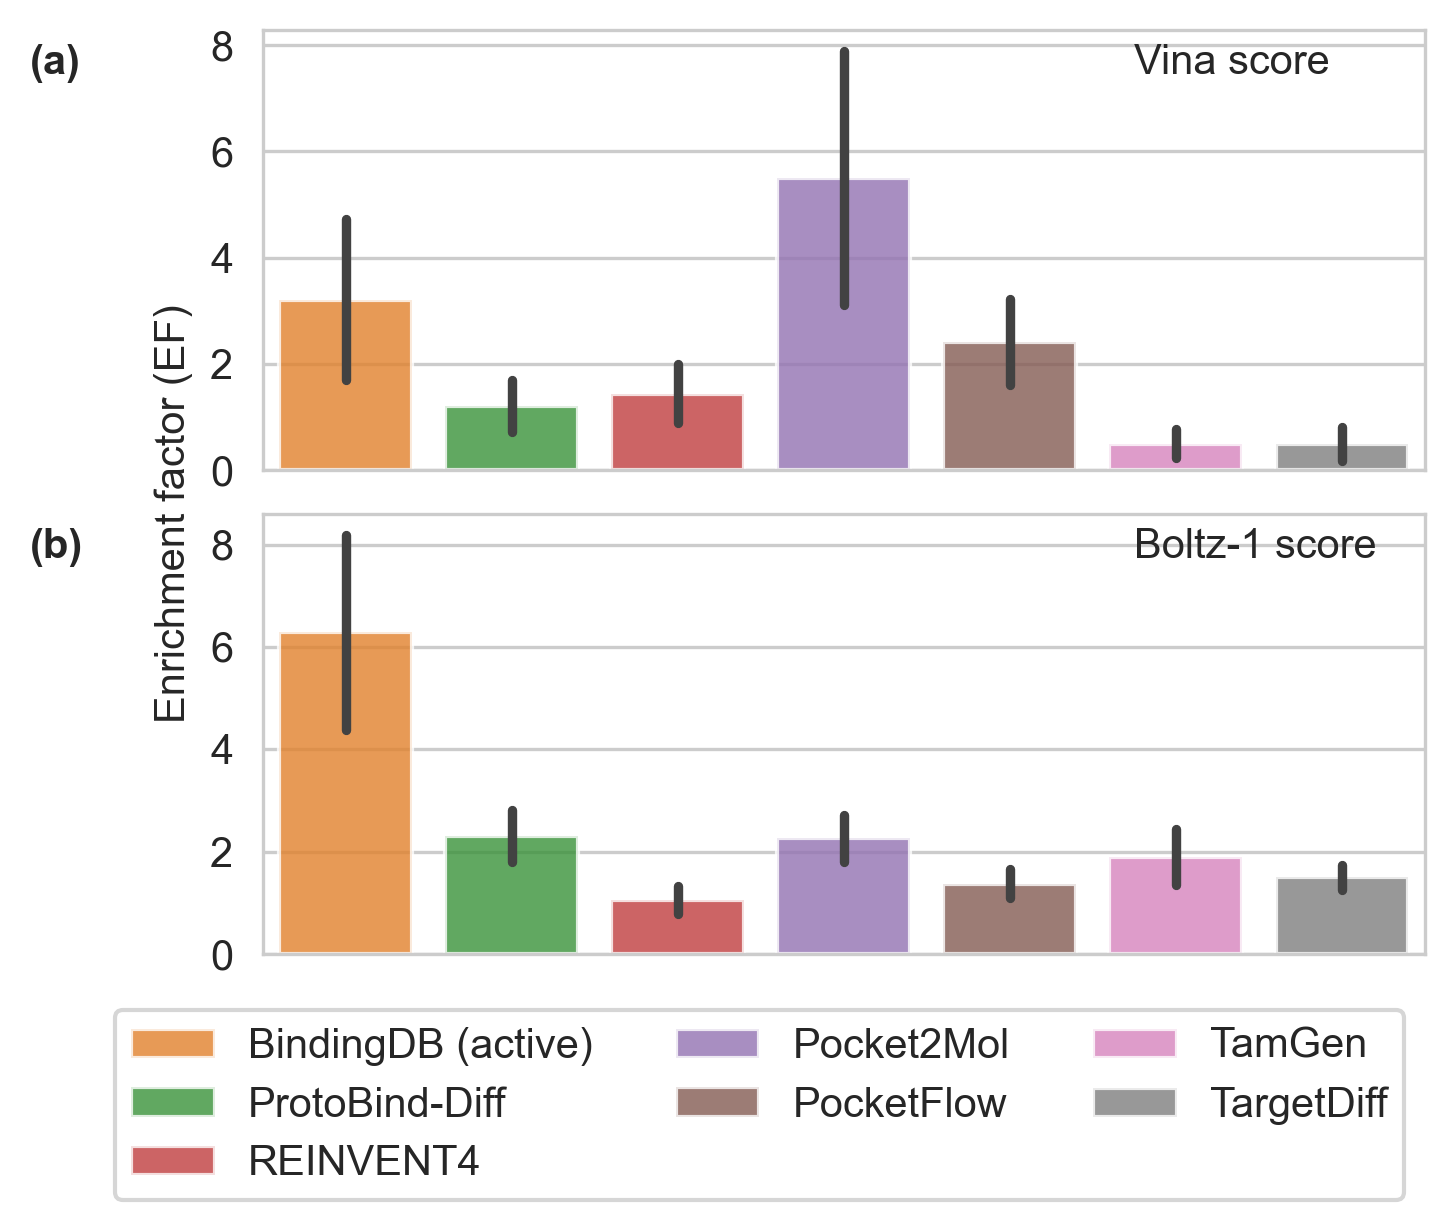

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 4), dpi=300, facecolor='white', 
                         gridspec_kw={'wspace': 0.3, 'hspace': 0.1})

ax = axes[0]
sns.barplot(data=data_enrich_vina, errorbar='se', order=datasets_other, hue_order=datasets_names, legend=False, ax=ax, alpha=0.8)
ax.set_xticklabels([])
ax.text(-0.2, 0.9, '(a)', transform=ax.transAxes, size=10, weight='bold')
ax.text(0.75, 0.9, 'Vina score', transform=ax.transAxes, size=10)



ax = axes[1]
sns.barplot(data=data_enrich_boltz, errorbar='se', order=datasets_other, hue_order=datasets_names, legend='brief', ax=ax, alpha=0.8)
ax.set_xticklabels([])
# ax.set_xlabel('Models, scored w. Vina')
ax.set_ylabel('Enrichment factor (EF)')
ax.yaxis.label.set_y(1.) 

ax.text(-0.2, 0.9, '(b)', transform=ax.transAxes, size=10, weight='bold')
ax.text(0.75, 0.9, 'Boltz-1 score', transform=ax.transAxes, size=10)


# Remove old legend and create new one
legend = ax.get_legend()
handles, labels = legend.legend_handles , legend.get_texts()
new_handles = handles[1:]  # Skip first handle
new_labels = [label.get_text() for label in labels[1:]]  # Skip first label
legend.remove()
ax.legend(new_handles, new_labels, bbox_to_anchor=(1., -0.08), ncols=3)

plt.tight_layout()
plt.savefig(results_path / 'figures' / 'enrichments.png', bbox_inches='tight')


plt.show()

8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03
8.0 0.03


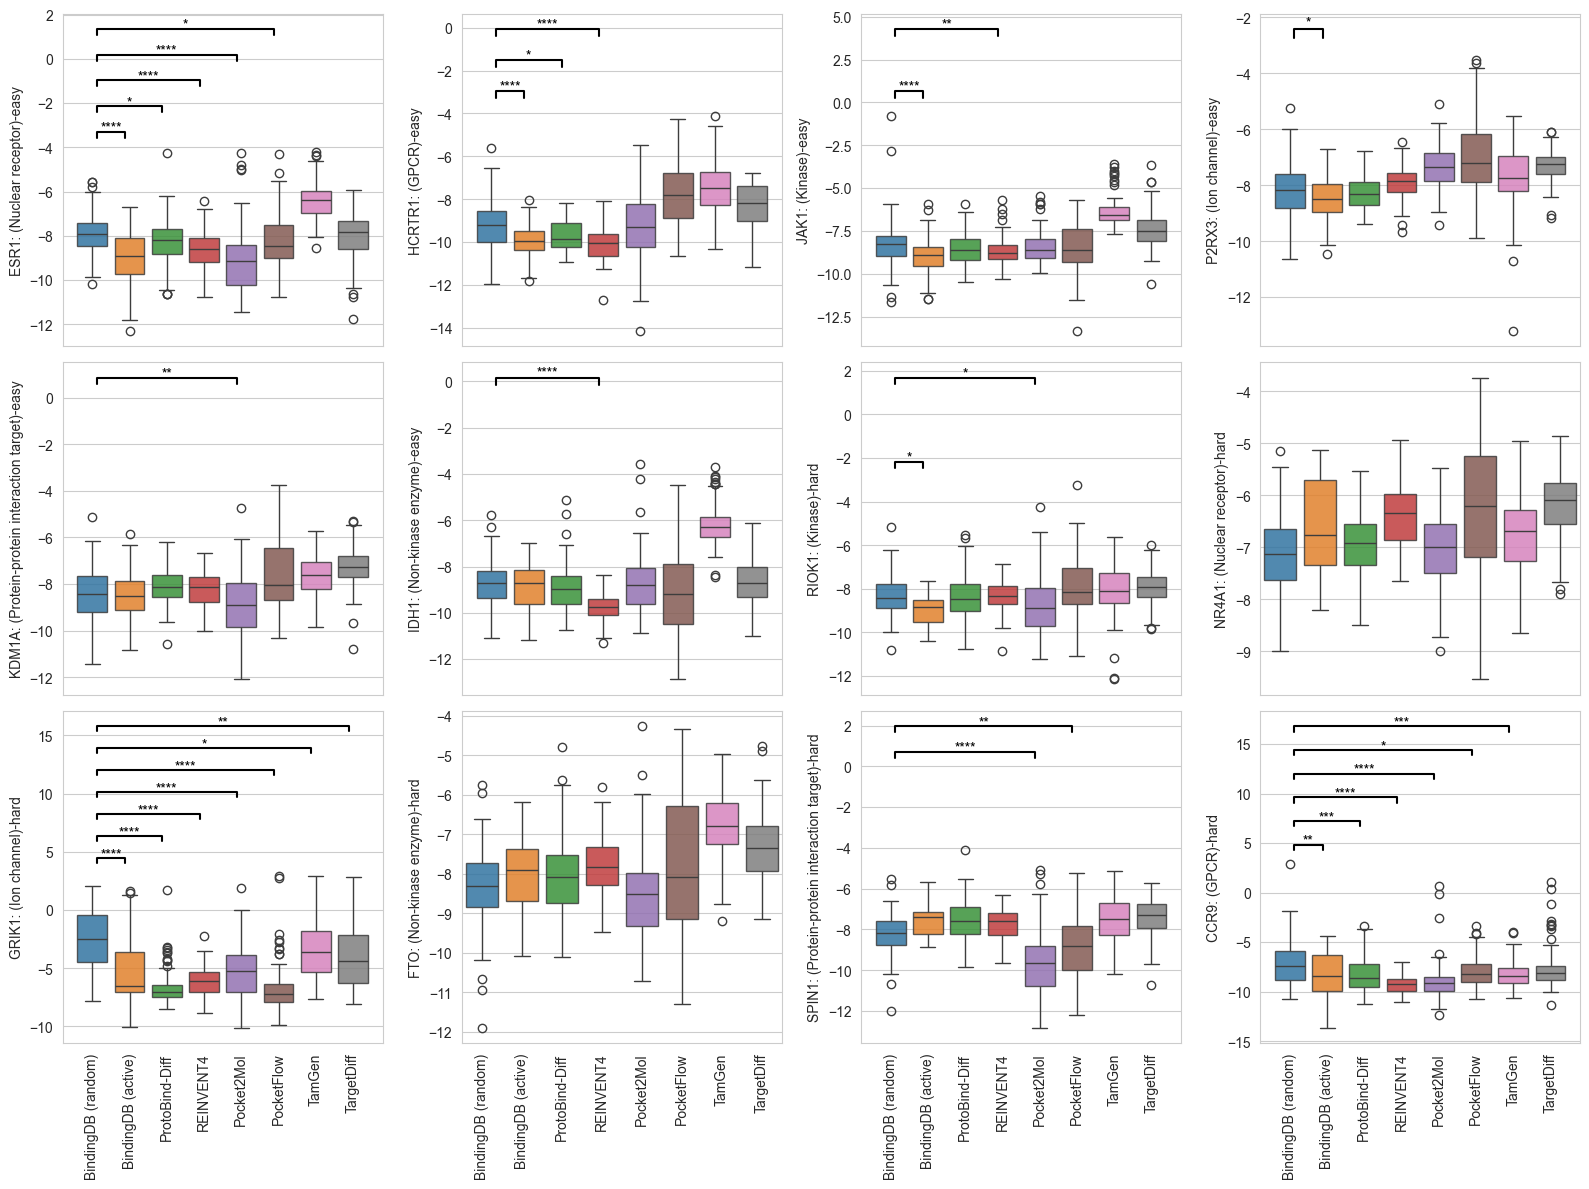

In [26]:
nrows = 3
ncols = len(data_plots) // nrows
if nrows * ncols < len(data_plots):
    ncols += 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(ncols*4, nrows*4)

axs_iter = iter(axs.flatten())

for i, (gene, df_) in enumerate(data_plots.items()):
    ax = next(axs_iter)
    sns.boxplot(data=df_, x="dataset", y='score', order=datasets_names, hue='dataset', ax=ax,
                hue_order=datasets_names, boxprops=dict(alpha=.85))
    starbars.draw_annotation(pvalues[gene], ns_show=False, ax=ax)
    if gene in annotation.index:
        anno = annotation.loc[gene]
        anno = f': ({anno["Family name"]})-{anno["Dataset type"]}'
    else:
        anno = ''
        
    ax.set_ylabel(gene + anno)
    if i // ncols < nrows - 1:
        ax.set_xticklabels([])
    else:
        ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel(None)
plt.tight_layout()
plt.savefig(results_path / 'figures' / 'vina_score.png')
plt.show()